In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

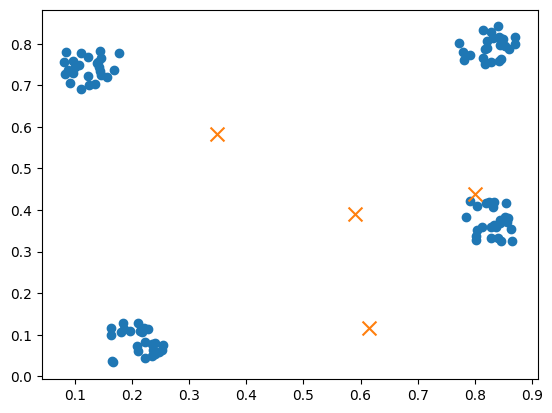

In [25]:
f = pd.read_csv("data1.csv")
vlist = np.array(f)
K=4

a = np.min(vlist[:,0])
b = np.max(vlist[:,0])
c = np.min(vlist[:,1])
d = np.max(vlist[:,1])

CCList = np.c_[(b-a)*np.random.rand(K)+a,(d-c)*np.random.rand(K)+c]
plt.scatter(vlist[:,0],vlist[:,1])
plt.scatter(CCList[:,0],CCList[:,1],s=100,marker="x")
plt.show()


In [26]:
def selectMin(x,CCList):
    
    minD = float("inf")
    minDindex= 0
    
    for index in range(len(CCList)):
        dist = np.linalg.norm(x-CCList[index])
        if minD > dist:
            minD = dist
            minDindex = index
    
    return index

In [27]:
def selectC(vlist,CCList):
    vlistIndex = []
    for row in vlist:
        selectedIndex = selectMin(row,CCList)
        vlistIndex.append(selectedIndex)
    
    return vlistIndex

In [28]:
def updateCC(vlist,vlistC,K):
    newCClist = []
    for numOfC in range(K):
        Z = []
        for index in range(len(vlist)):
            if(vlistC[index] == numOfC):
                Z.append(vlist[index])
        mc = np.mean(Z,0)
        newCClist.append(mc)
    return newCClist

In [32]:
maxLoop = 10000
currentLoop = 0
vlistC = []

while currentLoop<maxLoop:
    vlistC = selectC(vlist,CCList)
    updateCC(vlist,vlistC,K)
    currentLoop = currentLoop+1

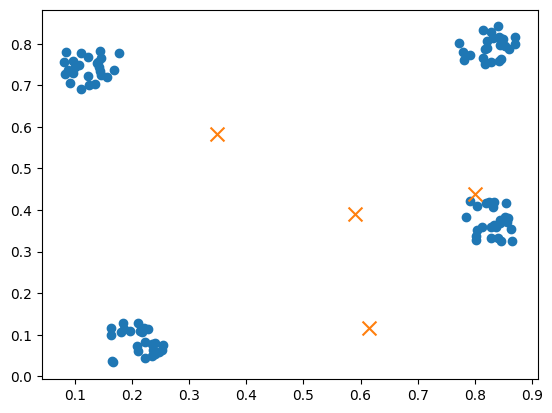

In [30]:
plt.scatter(vlist[:,0],vlist[:,1])
plt.scatter(CCList[:,0],CCList[:,1],s=100,marker="x")
plt.show()
